# TITANIC

## Task and Approch

The task is to explore the EDA and construct a model based on available data.
Preparing the dataset for analysis, checking for any correlation, creating a model, and evaluating the performance of the classification model
(using Logistic regression).

## Importing dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
titanic=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\jupyter lab\Titanic.csv")

In [3]:
# no.of rows and column
titanic.shape

(891, 12)

In [ ]:
# first 5 records
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

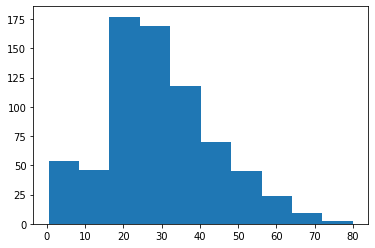

In [7]:
# for the missing value treatment checking the distribution
plt.hist(titanic['Age'])

Replacing missing values with Mean

In [8]:
# replacing missing value with mean and checking it's replaced or not 
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Age'].isna().sum()

0

In [9]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mockler, Miss. Helen Mary ""Ellie""",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Dropping unnecessary columns

In [10]:
titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

#### using function to describe plots

In [11]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

## Correlation of the variables with each other..

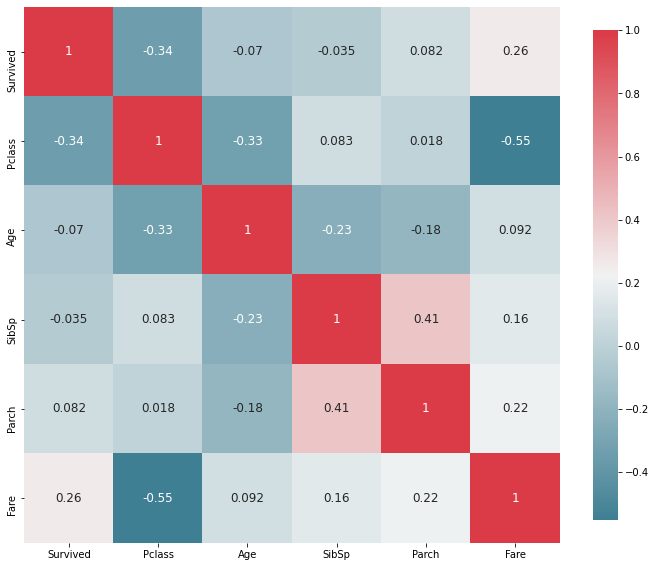

In [12]:
plot_correlation_map(titanic)

## Plot distributions of Age of passangers who survived or did not survive

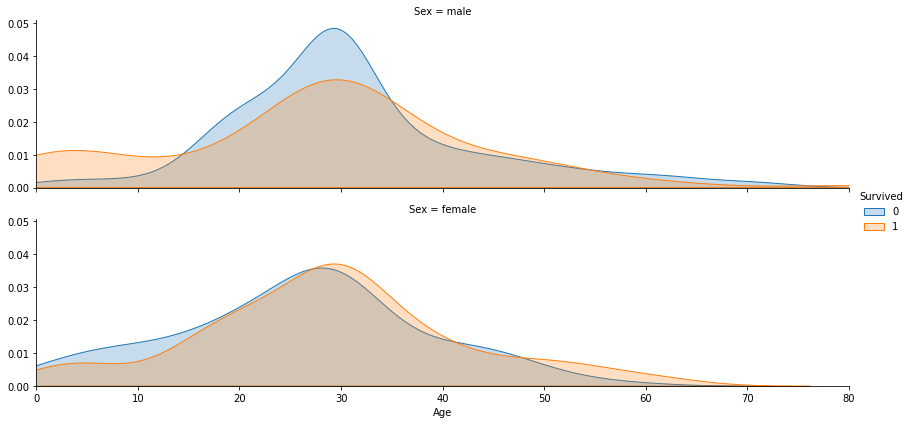

In [13]:
plot_distribution(titanic,var='Age',target='Survived',row='Sex')

Differences between survival for different values is what will be used to separate the target variable (survival) in the model.

### Plot Survival rate by Embarked,Sex,Pclass,SibSp and parch

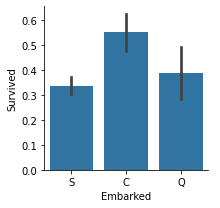

In [14]:
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

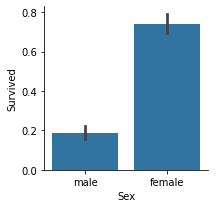

In [15]:
plot_categories( titanic , cat = 'Sex' , target = 'Survived' )

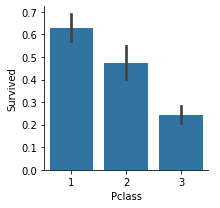

In [16]:
plot_categories( titanic , cat = 'Pclass' , target = 'Survived' )

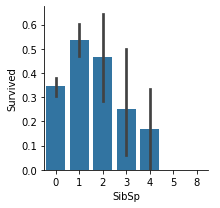

In [17]:
plot_categories( titanic , cat = 'SibSp' , target = 'Survived' )

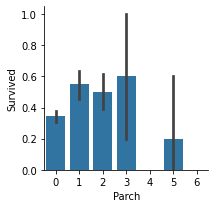

In [18]:
plot_categories( titanic , cat = 'Parch' , target = 'Survived' )

### Converting Categorical variables to numeric variables using dummies

In [19]:
sex=pd.get_dummies(titanic.Sex,prefix='Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
embarked = pd.get_dummies(titanic.Embarked,prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Inserting Dummies to Dataset

In [21]:
titanic=pd.concat([titanic,embarked,sex],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


## Plots of data

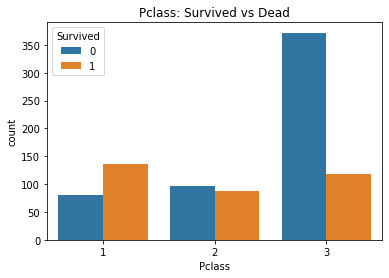

In [22]:
sns.countplot('Pclass', hue='Survived', data=titanic)
plt.title('Pclass: Survived vs Dead')
plt.show()

It is clearly seen that pasangers of Class 1 are given high priority while Rescue.

There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived.

In Class 2, survival and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived. So money and status matters here.

### Plot the crosstab of the data of Survied and the Sex, with the Pclass

In [23]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

### Percentage Plot

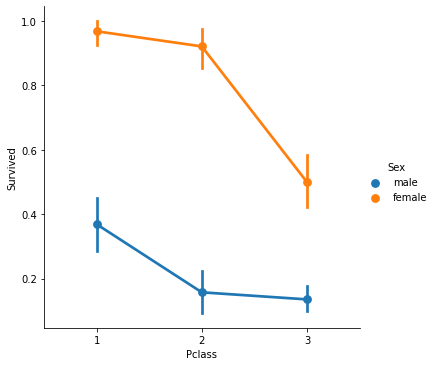

In [24]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic)
plt.show()

Looking at FactorPlot and CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died.

So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low. From this conclusion, PClass is also a important feature.

Dropping Categorical columns

In [25]:
titanic=titanic.drop(['Sex','Embarked'],axis=1)

### Train Test Split

In [26]:
# importing train_test_split and split data into train data and test data
from sklearn.model_selection import train_test_split
X = titanic.drop(['Survived'], axis=1)
Y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=100)

In [27]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (623, 10)
Test shape  -  (268, 10)


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# applying the equation on model
lr.fit(X_train,y_train)

LogisticRegression()

### Prediction

In [29]:
test_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, test_pred)

In [31]:
# Accuracy of test data
print('Accuracy is  :' ,accuracy)

Accuracy is  : 0.7910447761194029


In [32]:
train_pred = lr.predict(X_train)

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, train_pred)

In [34]:
# Accuracy of train data
print('Accuracy is  :' ,accuracy)

Accuracy is  : 0.812199036918138


### Finished